In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tangent_boundaries as tb
from math import pi

# Let us make a function that calculates the nnls distribution from the spectrum

In [14]:
thetas = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

i = -1 ### selected value of thea!!
Nx = 43
Ny = 33
nbands = int((Nx*Ny)/100*16)
print('Bands to calculate: ',nbands)


parameters = dict(
    Nx = Nx,
    Ny = Ny,
    B1 = 0, # no magnetic field
    N1 = 0, #
    d1 = 0, # These are irrelevant for B1 = 0
    N2 = 0, #
    potential = lambda x,y:0.0*np.random.rand(Ny,Nx),
    mass = lambda x,y:0*x,
    disorder = 0,
    theta = -(pi/2)*(thetas[i]/100),
)

Bands to calculate:  227


/home/alvaro/github/tangent-boundaries/tangent_boundaries.py:802: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


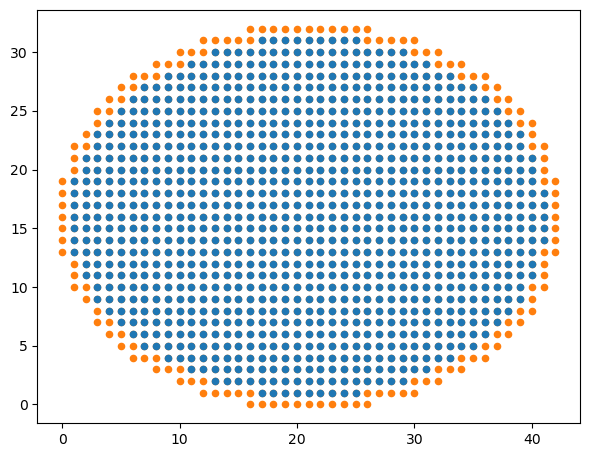

In [15]:
ener, states, degenerate_indices = tb.solve_eigenproblem_ellipse(parameters, number_of_bands = nbands, plot_shape = True)

(0.0, 152.0)

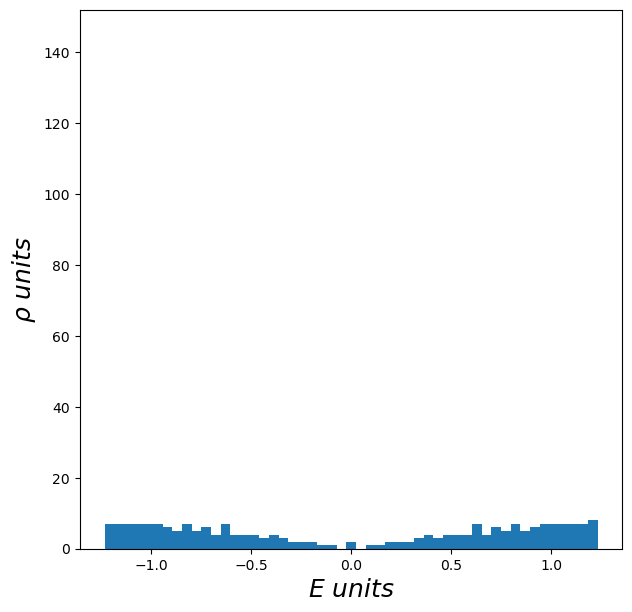

In [16]:
ran = max(ener)
nbins = 51
histogram, bin_edges = np.histogram(ener, bins = nbins, range = (-ran,ran), density = False)

y = histogram
x = (bin_edges[1:]+bin_edges[:-1])/2
dx = (bin_edges[1]-bin_edges[0])/2

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.bar(x,y,width = 2*dx)
ax.set_ylabel(r"$\rho$ $units$",fontsize = 18)
ax.set_xlabel(r"$E$ $units$",fontsize = 18)
ax.set_ylim(0,2*(Nx+Ny))



Number of orthogonalised states:  0


Text(0.5, 0, '$E$ $units$')

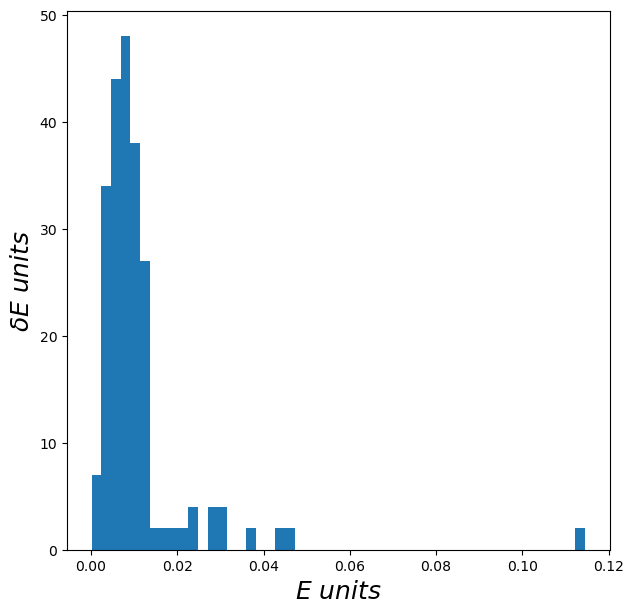

In [39]:
print("Number of orthogonalised states: " ,len(degenerate_indices))

def nnls_distribution(spectrum, nbins = 41):
    spacings = np.sort(spectrum)-np.roll(np.sort(spectrum),1)

    histogram, bin_edges = np.histogram(spacings[1:], bins = nbins_spacing, density = False )
    
    return histogram, bin_edges

nbins_spacing = 51
ls_distribution, bin_edges = nnls_distribution(ener, nbins = nbins_spacing)

x = (bin_edges[1:]+bin_edges[:-1])/2
dx = (bin_edges[1]-bin_edges[0])/2

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.bar(x,ls_distribution,width = 2*dx)
ax.set_ylabel(r"$\delta E$ $units$",fontsize = 18)
ax.set_xlabel(r"$E$ $units$",fontsize = 18)


## Compare with the square

In [ ]:
parameters['Nx'] =  int(np.round(np.sqrt(pi*Nx*Ny)))
parameters['Ny'] =  int(np.round(np.sqrt(pi*Nx*Ny)))

ener_square, states_square, degenerate_indices_square = tb.solve_eigenproblem_square(parameters, number_of_bands = nbands)

Text(0.5, 0, '$E$ $units$')

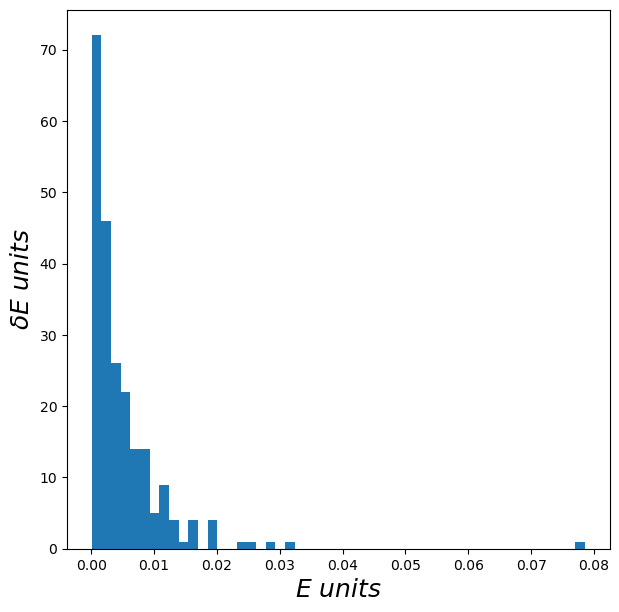

In [40]:
ls_distribution_square, bin_edges_square = nnls_distribution(ener_square, nbins = nbins_spacing)

x = (bin_edges_square[1:]+bin_edges_square[:-1])/2
dx = (bin_edges_square[1]-bin_edges_square[0])/2

fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.bar(x,ls_distribution_square,width = 2*dx)
ax.set_ylabel(r"$\delta E$ $units$",fontsize = 18)
ax.set_xlabel(r"$E$ $units$",fontsize = 18)

It would be nice to check how this works in a larger system, we need to run in in the cluster.

## Better statistics

In [40]:
def staircase_function(energy, spectrum, nbins = 41):
    '''Staircase function.'''
    return np.where(np.sort(np.append(spectrum, energy))==energy)[0][0]

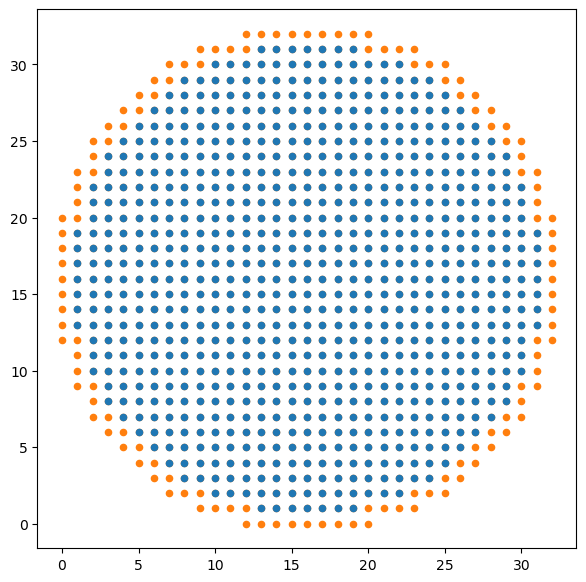

In [82]:
ener, states, degenerate_indices = tb.solve_eigenproblem_ellipse(parameters, number_of_bands = nbands, plot_shape = True)

In [83]:
energies = np.linspace(-max(ener), max(ener),1000)
staircase = np.zeros(len(energies))
for i, e in enumerate(energies):
    staircase[i] = staircase_function(e,ener)

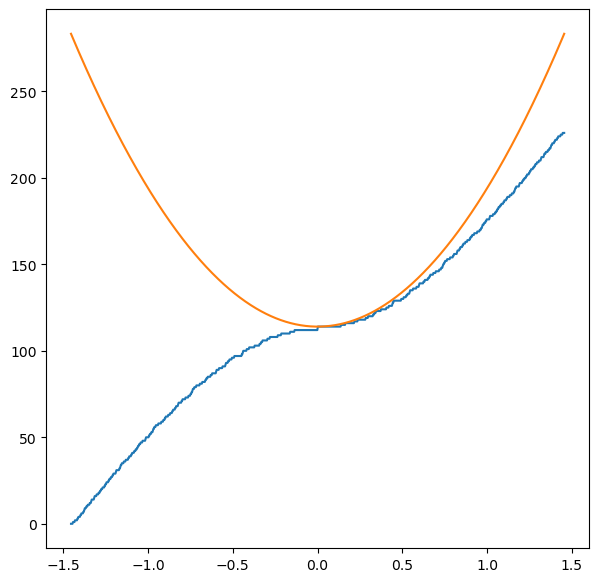

In [84]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(energies, staircase)
ax.plot(energies, 80*energies**2+ np.sort(staircase)[len(staircase)//2] * np.ones(len(energies)))

## It is not so quadratic, unfolding would be hard

In [85]:
parameters['Nx'] =  int(np.round(np.sqrt(pi*Nx*Ny/4)))
parameters['Ny'] =  int(np.round(np.sqrt(pi*Nx*Ny/4)))

ener_square, states, degenerate_indices = tb.solve_eigenproblem_square(parameters, number_of_bands = nbands)

In [86]:
energies = np.linspace(-max(ener_square), max(ener_square),1000)
staircase_square = np.zeros(len(energies))
for i, e in enumerate(energies):
    staircase_square[i] = staircase_function(e,ener_square)

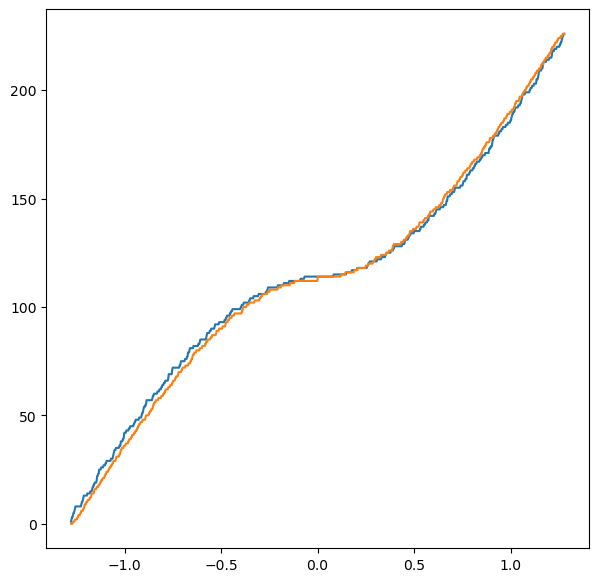

In [89]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(111)
ax.plot(energies, staircase_square)
ax.plot(energies, staircase)
#ax.plot(energies, 80*energies**2+ np.sort(staircase_square)[len(staircase_square)//2] * np.ones(len(energies)))

## Yet, the fluctuations look different, that's good

## We should do ratio of level spacing statistics